<a href="https://colab.research.google.com/github/poitrew11/Kaggle-Competition/blob/main/Predict_Calorie/Calories_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
!unzip playground-series-s5e5.zip

Archive:  playground-series-s5e5.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
print(data.head(5))
print(data.shape)

   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
(750000, 9)


In [2]:
print(data['Sex'].unique())

['male' 'female']


In [3]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0}).fillna(-1)
data.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
x = data.drop(['id', 'Calories'], axis = 1)
Y = data['Calories']
x.head(5)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,36,189.0,82.0,26.0,101.0,41.0
1,0,64,163.0,60.0,8.0,85.0,39.7
2,0,51,161.0,64.0,7.0,84.0,39.8
3,1,20,192.0,90.0,25.0,105.0,40.7
4,0,38,166.0,61.0,25.0,102.0,40.6


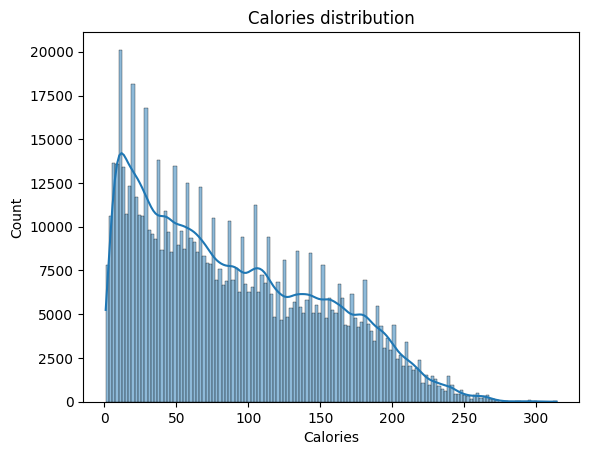

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = data, x = 'Calories', kde = True)
plt.title("Calories distribution")
plt.show()

In [6]:
print(x.isna().sum())
print(Y.isna().sum())
x.head(5)

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
0


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,36,189.0,82.0,26.0,101.0,41.0
1,0,64,163.0,60.0,8.0,85.0,39.7
2,0,51,161.0,64.0,7.0,84.0,39.8
3,1,20,192.0,90.0,25.0,105.0,40.7
4,0,38,166.0,61.0,25.0,102.0,40.6


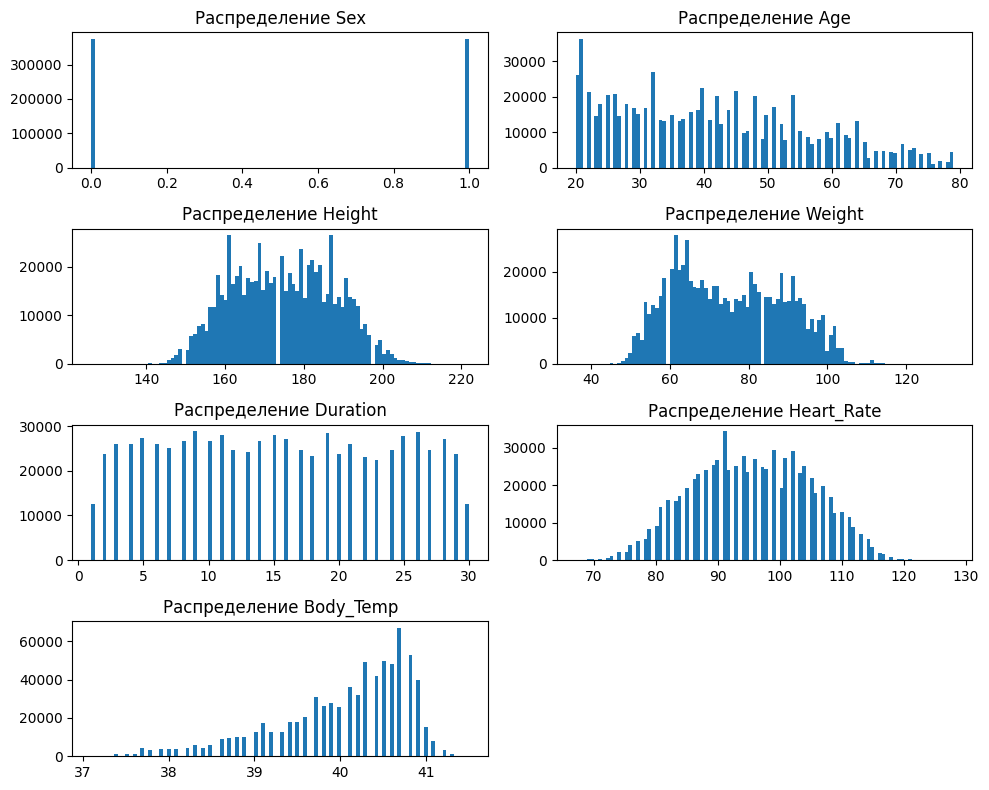

In [7]:
plt.figure(figsize = (10,8))
for i, col in enumerate(x, 1):
  plt.subplot(4,2,i)
  plt.hist(x[col], bins = 100)
  plt.title(f"Распределение {col}")
plt.tight_layout()
plt.show()

In [8]:
x = data.drop(['id', 'Calories'], axis = 1)
x.head(5)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,36,189.0,82.0,26.0,101.0,41.0
1,0,64,163.0,60.0,8.0,85.0,39.7
2,0,51,161.0,64.0,7.0,84.0,39.8
3,1,20,192.0,90.0,25.0,105.0,40.7
4,0,38,166.0,61.0,25.0,102.0,40.6


In [9]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

key_cols = ['Height', 'Weight', 'Heart_Rate']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x[key_cols])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_data)

new_cols = ['orig1', 'orig2', 'orig3', 'sq1', 'sq2', 'sq3', 'int12', 'int13', 'int23']
x[new_cols] = poly_features

x.head(5)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,orig1,orig2,orig3,sq1,sq2,sq3,int12,int13,int23
0,1,36,189.0,82.0,26.0,101.0,41.0,1.115235,0.490201,0.583714,1.243749,0.546689,0.650978,0.240297,0.286137,0.340722
1,0,64,163.0,60.0,8.0,85.0,39.7,-0.912137,-1.083172,-1.109436,0.831993,0.988001,1.011958,1.173262,1.201711,1.230849
2,0,51,161.0,64.0,7.0,84.0,39.8,-1.068088,-0.797104,-1.215258,1.140813,0.851378,1.298003,0.635376,0.968688,1.476853
3,1,20,192.0,90.0,25.0,105.0,40.7,1.349162,1.062337,1.007002,1.820239,1.433265,1.358609,1.128560,1.069775,1.014053
4,0,38,166.0,61.0,25.0,102.0,40.6,-0.678209,-1.011655,0.689536,0.459968,0.686114,-0.467650,1.023447,-0.697573,0.475460


In [10]:
x = x.drop(['orig1', 'orig2', 'orig3'], axis = 1)
x.head(5)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,sq1,sq2,sq3,int12,int13,int23
0,1,36,189.0,82.0,26.0,101.0,41.0,1.243749,0.546689,0.650978,0.240297,0.286137,0.340722
1,0,64,163.0,60.0,8.0,85.0,39.7,0.831993,0.988001,1.011958,1.173262,1.201711,1.230849
2,0,51,161.0,64.0,7.0,84.0,39.8,1.140813,0.851378,1.298003,0.635376,0.968688,1.476853
3,1,20,192.0,90.0,25.0,105.0,40.7,1.820239,1.433265,1.358609,1.128560,1.069775,1.014053
4,0,38,166.0,61.0,25.0,102.0,40.6,0.459968,0.686114,-0.467650,1.023447,-0.697573,0.475460


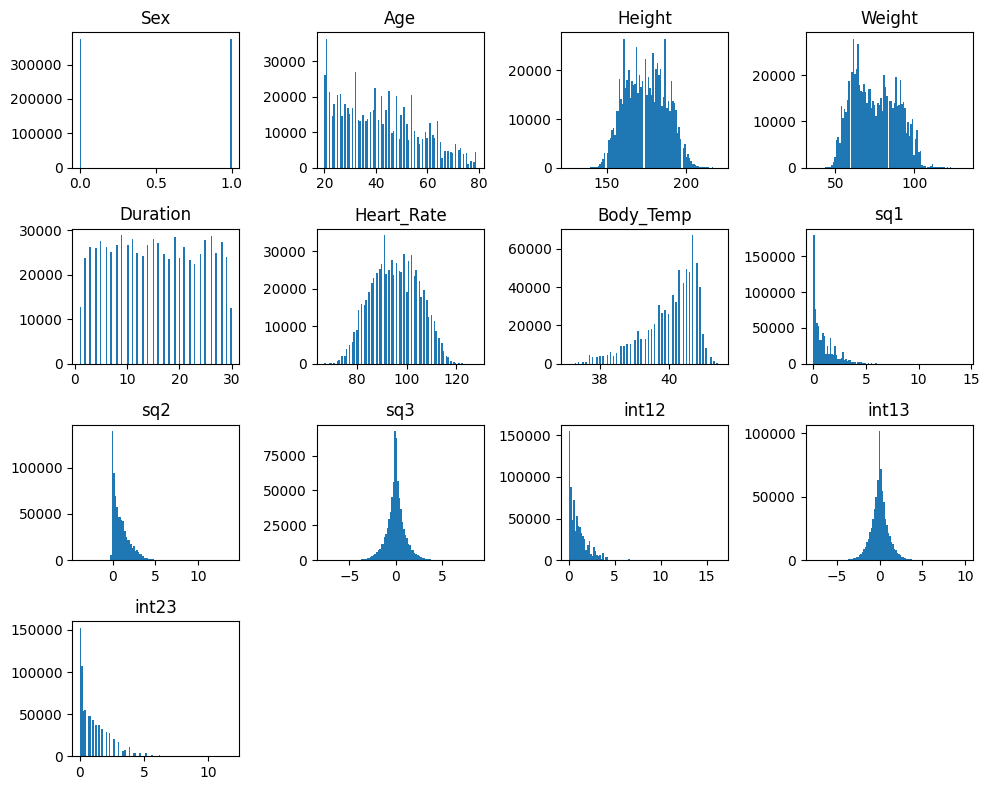

In [11]:
plt.figure(figsize = (10, 8))
for i, col in enumerate(x, 1):
  plt.subplot(4, 4, i)
  plt.hist(x[col], bins = 100)
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [12]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

def split_dataset(x, test_size = 0.25):
  test_indeces = np.random.rand(len(x)) < test_size
  return x[~test_indeces], x[test_indeces]
x['Calories'] = data['Calories']
train_ds_pd, valid_ds_pd = split_dataset(x, test_size = 0.25)
print(f"Shape of train: {train_ds_pd.shape}, Shape of test: {valid_ds_pd.shape}")

Shape of train: (562764, 14), Shape of test: (187236, 14)


In [13]:
label = 'Calories'

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label = label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label = label, task = tfdf.keras.Task.REGRESSION)
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [28]:
model = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=300,
    max_depth=20,
    shrinkage=0.1,
    subsample=0.8,
    early_stopping="LOSS_INCREASE",
    verbose=2
)
model.fit(train_ds, validation_data=valid_ds)

Use 2 thread(s) for training
Use /tmp/tmp97u99k_f as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Sex': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Age': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Height': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Weight': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Duration': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'Heart_Rate': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Body_Temp': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'sq1': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'sq2': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'sq3': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'int12': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'int13': <tf.Tensor 'data_11:0' shape=(None,) dtype=float64>, 'int23': <tf.Tensor 'data_12:0' shape=(None,) dtype=float64>}
Label: Tensor("data_13:0", shape=(None,), dtype=float64)
We

I0000 00:00:1747039813.763282   34830 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1747039813.763329   34830 kernel.cc:783] Collect training examples
I0000 00:00:1747039813.763346   34830 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1747039813.763493   34830 kernel.cc:401] Number of batches: 563
I0000 00:00:1747039813.763506   34830 kernel.cc:402] Number of examples: 562764
I0000 00:00:1747039813.830182   34830 kernel.cc:802] Training dataset:
Number of records: 562764
Number of columns: 14

Number of columns by type:
	NUMERICAL: 14 (100%)

Columns:

NUMERICAL: 14 (100%)
	0: "Age" NUMERICAL mean:41.4191 min:20 max:79 sd:15.1686
	1: "Body_Temp" NUMERICAL mean:40.0374 min:37.1 max:41.5 sd:0.778676


Model trained in 0:14:02.150265
Compiling model...
Model compiled.


In [29]:
dataset = pd.read_csv('test.csv')
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

key_cols = ['Height', 'Weight', 'Heart_Rate']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[key_cols])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_data)

new_cols = ['orig1', 'orig2', 'orig3', 'sq1', 'sq2', 'sq3', 'int12', 'int13', 'int23']
dataset[new_cols] = poly_features

dataset = dataset.drop(['orig1', 'orig2', 'orig3', 'id'], axis = 1)
dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}).fillna(-1)
dataset.head(5)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,sq1,sq2,sq3,int12,int13,int23
0,1,45,177.0,81.0,7.0,87.0,39.8,0.031464,0.074258,-0.159154,0.175254,-0.375617,0.805047
1,1,26,200.0,97.0,20.0,101.0,40.5,3.885514,3.081272,1.151588,2.443495,0.913227,0.341307
2,0,29,188.0,85.0,16.0,102.0,40.4,1.071805,0.729632,0.714378,0.496697,0.486313,0.476146
3,0,39,172.0,73.0,20.0,107.0,40.6,0.045188,0.032658,-0.259154,0.023603,-0.187298,1.486269
4,0,30,173.0,67.0,16.0,94.0,40.5,0.018113,0.078439,0.021064,0.339695,0.091222,0.024497


In [30]:
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, task = tfdf.keras.Task.REGRESSION)
predictions = model.predict(dataset_tf)

250/250 [==============================] - 43s 170ms/step


In [31]:
results = pd.DataFrame({
    'id': range(750000, 750000 + len(predictions)),
    'Calories': predictions.flatten()
})

results.to_csv('predictions_2.csv', index = False)